# Experiment 7
**Aim**: WAP to implement KNN Algorithm

# K-Nearest Neighbors (KNN) Algorithm

K-Nearest Neighbors is a simple and intuitive machine learning algorithm used for classification and regression tasks. The fundamental idea behind KNN is that data points close to each other in the feature space are likely to have similar labels (for classification) or similar values (for regression).

The KNN algorithm can be summarized as follows:

- Choose the number of neighbors (k) for the classification task.
- For each data point in the test set, calculate the distances to all data points in the training set using a distance metric (usually Euclidean distance).
- Select the k-nearest data points in the training set with the shortest distances to the test point.
- For classification, count the number of data points in each class among the k-nearest neighbors and assign the class that is most frequent as the predicted class for the test point.
- For regression, calculate the average (or weighted average) of the target values of the k-nearest neighbors and assign this as the predicted value for the test point.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Generate a synthetic dataset
X, y = make_blobs(n_samples=200, centers=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

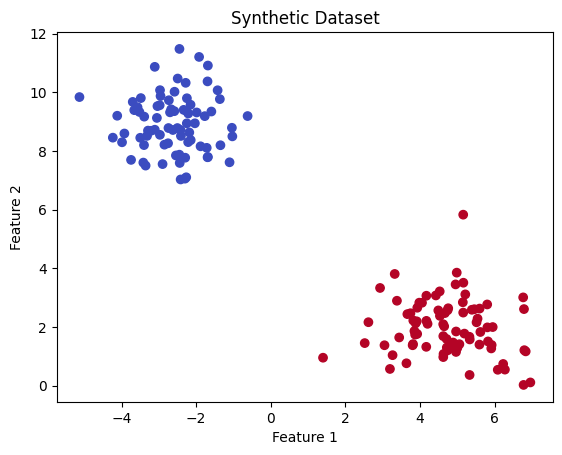

In [3]:
# Visualize the dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Dataset')
plt.show()

In [4]:
# KNN Algorithm Implementation
def knn_predict(X_train, y_train, X_test, k):
    y_pred = []
    for x in X_test:
        # Calculate Euclidean distances
        distances = [np.linalg.norm(x - x_train) for x_train in X_train]
        # Get the indices of the k-nearest neighbors
        k_indices = np.argsort(distances)[:k]
        # Get the labels of the k-nearest neighbors
        k_nearest_labels = [y_train[i] for i in k_indices]
        # Predict the class with the most common label
        most_common = np.bincount(k_nearest_labels).argmax()
        y_pred.append(most_common)
    return y_pred


In [ ]:
# Choose the value of k
k = 3

# Make predictions using the custom KNN function
y_custom_pred = knn_predict(X_train, y_train, X_test, k)
y_custom_pred

In [7]:
# Make predictions using scikit-learn's KNN
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_sklearn_pred = knn.predict(X_test)

In [8]:
# Calculate accuracy of both predictions
accuracy_custom = accuracy_score(y_test, y_custom_pred)
accuracy_sklearn = accuracy_score(y_test, y_sklearn_pred)
# Compare the custom KNN and scikit-learn KNN
print(f'Custom KNN Accuracy: {accuracy_custom}')
print(f'scikit-learn KNN Accuracy: {accuracy_sklearn}')


Custom KNN Accuracy: 1.0
scikit-learn KNN Accuracy: 1.0


In [9]:
# Visualize the decision boundary
def plot_decision_boundary(X, y, model, title):
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)

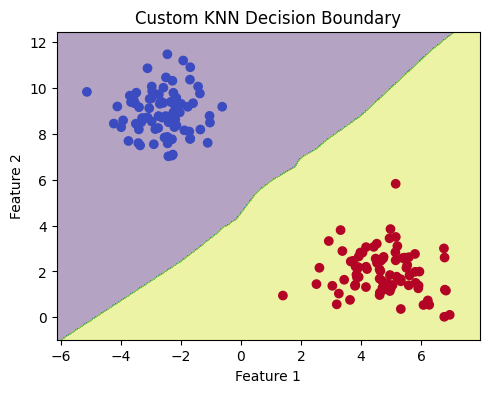

In [10]:

# Plot the decision boundary for custom KNN
plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_decision_boundary(X_train, y_train, knn, 'Custom KNN Decision Boundary')


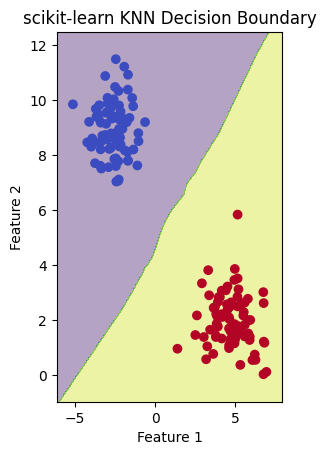

In [11]:

# Plot the decision boundary for scikit-learn KNN
plt.subplot(122)
plot_decision_boundary(X_train, y_train, knn, 'scikit-learn KNN Decision Boundary')

plt.show()